In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import tqdm
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [10]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Incarceration_Data/cleaned_prison_data.csv')

In [11]:
df

,Unnamed: 0,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,...,native_prison_pop_rate,white_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate
0,0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153806,153806,201456045,2014,56045,WY,Weston County,7138,4606,2064,2542,...,0.0,0.00,86.84,0.0,0.00,0.0,0.0,0.0,0.0,0.00
153807,153807,201556045,2015,56045,WY,Weston County,7197,4614,2070,2544,...,0.0,0.00,108.37,0.0,196.54,0.0,0.0,0.0,0.0,94.47
153808,153808,201656045,2016,56045,WY,Weston County,7213,4582,2086,2496,...,0.0,310.04,87.30,0.0,160.26,0.0,0.0,0.0,0.0,95.40
153809,153809,201756045,2017,56045,WY,Weston County,6986,4402,1985,2417,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00


In [12]:
df.drop(['state','county_name'],axis = 1,inplace=True)

In [13]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df['total_jail_pop'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                    -34.029546
p-value                             0.000000
#Lags Used                         76.000000
Number of Observations Used    153732.000000
dtype: float64


In [14]:

# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [15]:
total_jail_pop_df = df[[ 'total_jail_pop']].copy()

<Figure size 1224x576 with 0 Axes>

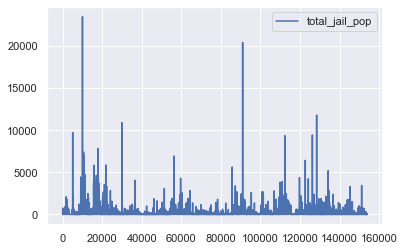

In [16]:
plt.figure(figsize=(17,8))
total_jail_pop_df.plot.line()

In [17]:
diff_jail_pop = total_jail_pop_df.diff().rename(index=str, columns={"total_jail_pop": "total jail pop"})

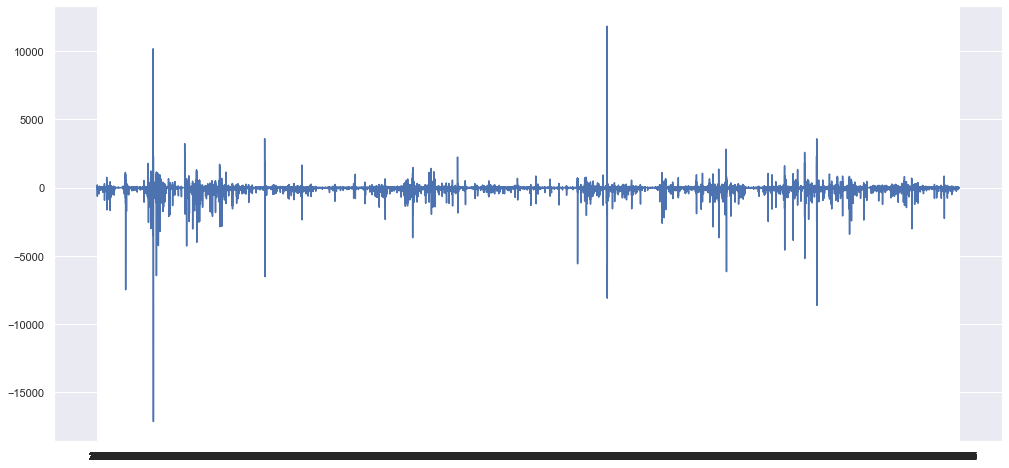

In [18]:
#plot of differenced data (more stationary)
plt.figure(figsize=(17,8))
plt.plot(diff_jail_pop)

In [19]:
total_jail_lag_1 = total_jail_pop_df.shift(periods=1)
total_jail_lag_2 = total_jail_pop_df.shift(periods=2)

No handles with labels found to put in legend.


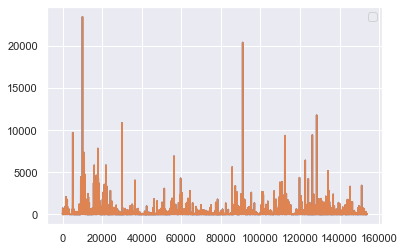

In [20]:
plt.plot(total_jail_pop_df)
plt.plot(total_jail_lag_1)
plt.legend()

No handles with labels found to put in legend.


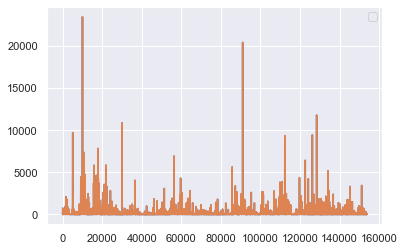

In [21]:
plt.plot(total_jail_pop_df)
plt.plot(total_jail_lag_2)
plt.legend()

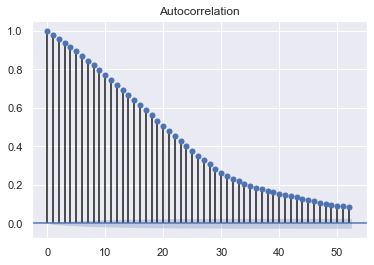

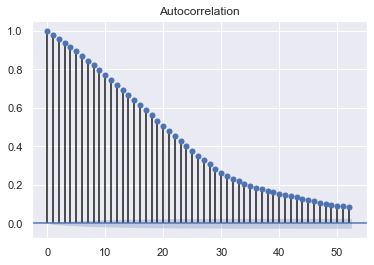

In [22]:

##auto corr for opening 

#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(total_jail_pop_df[:-1], alpha=.05)

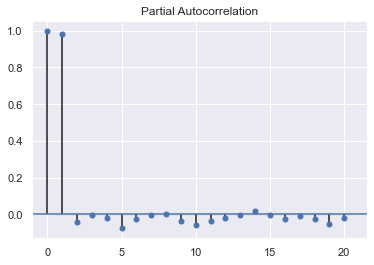

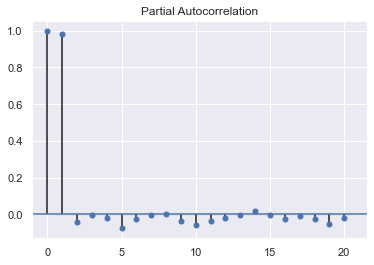

In [23]:
plot_pacf(total_jail_pop_df[:-1], alpha=.05, lags=20)

In [24]:
#total_jail_pop_df.Train=close_df[1:1150,] 
#total_jail_pop_df.Test=close_df[1151:1437,] 

In [25]:
model = ARIMA(total_jail_pop_df[:-1], order=(3,1,0))
jail_pop_model_fit = model.fit(disp=0)
print(jail_pop_model_fit.summary())

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.total_jail_pop   No. Observations:               153809
Model:                 ARIMA(3, 1, 0)   Log Likelihood             -953547.727
Method:                       css-mle   S.D. of innovations            119.178
Date:                Mon, 02 Nov 2020   AIC                        1907105.453
Time:                        14:46:12   BIC                        1907155.171
Sample:                             1   HQIC                       1907120.255
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.251e-05      0.312      0.000      1.000      -0.612       0.613
ar.L1.D.total_jail_pop     0.0292      0.003     11.471      0.000       0.024       0.034
ar.L

In [26]:
# model = ARIMA(total_jail_pop_df[:-1], order=(2,2,3))
# jail_pop_model_fit = model.fit(disp=0)
# print(jail_pop_model_fit.summary())

In [27]:
# model = ARIMA(total_jail_pop_df[:-1], order=(4,2,3))
# jail_pop_model_fit = model.fit(disp=0)
# print(jail_pop_model_fit.summary())

<Figure size 1224x576 with 0 Axes>

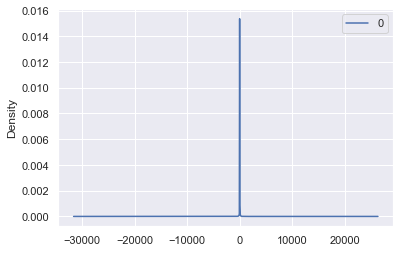

In [28]:
plt.figure(figsize=(17,8))
residuals = pd.DataFrame(jail_pop_model_fit.resid)
residuals.plot(kind='kde')
plt.show()

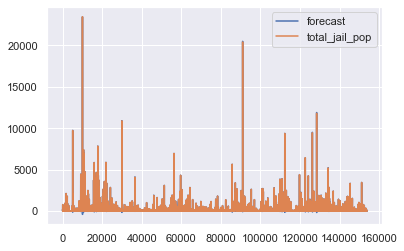

<Figure size 1224x576 with 0 Axes>

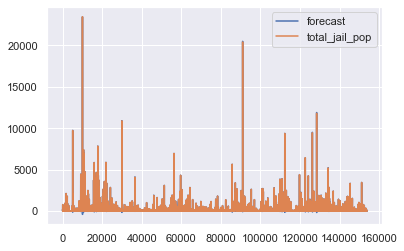

In [29]:
plt.figure(figsize=(17,8))
jail_pop_model_fit.plot_predict()

<Figure size 1224x576 with 0 Axes>

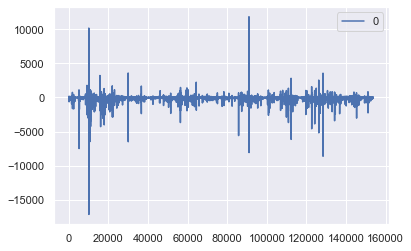

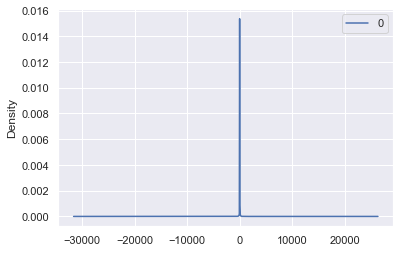

                  0
count  1.538090e+05
mean  -7.231495e-12
std    1.191785e+02
min   -1.712375e+04
25%   -1.656717e-01
50%    3.313389e-01
75%    3.095395e+00
max    1.182489e+04


In [30]:
# plot open residual errors

plt.figure(figsize=(17,8))
residuals = pd.DataFrame(jail_pop_model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [31]:
preds = jail_pop_model_fit.predict()

In [32]:
preds

2         0.000032
3         0.000032
4         0.000032
5         0.000032
6         0.000032
            ...   
153805   -0.031660
153806   -0.031269
153807    0.001891
153808   -0.009294
153809    0.000032
Length: 153808, dtype: float64

In [33]:
jail_pop_model_fit.forecast()

(array([5.00003161]),
 array([119.17808405]),
 array([[-228.58472088,  238.5847841 ]]))